In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import gensim
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Emotion_classify_Data.csv")

In [3]:
df

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [4]:
df['preprocessed_text'] = df['Comment'].apply(gensim.utils.simple_preprocess)

In [5]:
df.head()

,Comment,Emotion,preprocessed_text
0,i seriously hate one subject to death but now ...,fear,"[seriously, hate, one, subject, to, death, but..."
1,im so full of life i feel appalled,anger,"[im, so, full, of, life, feel, appalled]"
2,i sit here to write i start to dig out my feel...,fear,"[sit, here, to, write, start, to, dig, out, my..."
3,ive been really angry with r and i feel like a...,joy,"[ive, been, really, angry, with, and, feel, li..."
4,i feel suspicious if there is no one outside l...,fear,"[feel, suspicious, if, there, is, no, one, out..."


In [6]:
model = gensim.models.Word2Vec(
    window = 5, # The number of words to train on before and after the word
    min_count = 3,  # The minimum words in a sentence
)

In [7]:
help(model)

Help on Word2Vec in module gensim.models.word2vec object:

class Word2Vec(gensim.utils.SaveLoad)
 |  Word2Vec(sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)
 |  
 |  Method resolution order:
 |      Word2Vec
 |      gensim.utils.SaveLoad
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sentences=None, corpus_file=None, vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, epochs=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10

In [8]:
model

In [9]:
model.build_vocab(df['preprocessed_text'], progress_per = 1000,)


In [10]:
model.epochs

5

In [11]:
model.train(df['preprocessed_text'], total_examples = model.corpus_count, epochs = model.epochs*8)

(2643237, 4061480)

In [12]:
model.wv.most_similar("hate")

[('despised', 0.6684761047363281),
 ('insulted', 0.6335447430610657),
 ('considerate', 0.6256855726242065),
 ('strongly', 0.6047801971435547),
 ('hurt', 0.5991294980049133),
 ('badly', 0.5951898694038391),
 ('guess', 0.5842488408088684),
 ('causing', 0.5793904662132263),
 ('mention', 0.5718780159950256),
 ('selfish', 0.5708577036857605)]

In [13]:
model.wv.most_similar("love")

[('supporting', 0.6549326777458191),
 ('trusting', 0.5802561044692993),
 ('trust', 0.5535882711410522),
 ('meet', 0.5356930494308472),
 ('respected', 0.5231747627258301),
 ('hated', 0.5150881409645081),
 ('helping', 0.5137102603912354),
 ('hate', 0.5045234560966492),
 ('eyes', 0.5038255453109741),
 ('else', 0.4974716603755951)]

In [14]:
model.wv.most_similar("strong")

[('honoured', 0.6175017952919006),
 ('cared', 0.6130668520927429),
 ('blessed', 0.5420779585838318),
 ('productive', 0.5403321981430054),
 ('gonna', 0.5246980786323547),
 ('honored', 0.5229147672653198),
 ('brave', 0.5220637321472168),
 ('truthful', 0.520897388458252),
 ('happy', 0.5168888568878174),
 ('shall', 0.5036666989326477)]

In [15]:
model.wv.most_similar("life")

[('mind', 0.5450121760368347),
 ('everyday', 0.5367690324783325),
 ('body', 0.5318498611450195),
 ('job', 0.5169435739517212),
 ('brain', 0.5132368206977844),
 ('own', 0.5119423270225525),
 ('faith', 0.505011260509491),
 ('new', 0.4826200008392334),
 ('progress', 0.47710102796554565),
 ('journal', 0.4739491641521454)]

In [16]:
model.wv.similarity(w1 = 'sad', w2 = 'joy')

-0.24502249

In [17]:
model.wv.similarity(w1 = 'depressed', w2 = 'sad')

0.685712

In [18]:
model.wv.similarity(w1 = 'married', w2 = 'happy')

0.30361813

In [19]:
df

,Comment,Emotion,preprocessed_text
0,i seriously hate one subject to death but now ...,fear,"[seriously, hate, one, subject, to, death, but..."
1,im so full of life i feel appalled,anger,"[im, so, full, of, life, feel, appalled]"
2,i sit here to write i start to dig out my feel...,fear,"[sit, here, to, write, start, to, dig, out, my..."
3,ive been really angry with r and i feel like a...,joy,"[ive, been, really, angry, with, and, feel, li..."
4,i feel suspicious if there is no one outside l...,fear,"[feel, suspicious, if, there, is, no, one, out..."
...,...,...,...
5932,i begun to feel distressed for you,fear,"[begun, to, feel, distressed, for, you]"
5933,i left feeling annoyed and angry thinking that...,anger,"[left, feeling, annoyed, and, angry, thinking,..."
5934,i were to ever get married i d have everything...,joy,"[were, to, ever, get, married, have, everythin..."
5935,i feel reluctant in applying there because i w...,fear,"[feel, reluctant, in, applying, there, because..."


In [20]:
def joinToText(ele):
    return " ".join(ele)

In [21]:
df['preprocessed_text']=df['preprocessed_text'].apply(joinToText)


In [22]:
df

,Comment,Emotion,preprocessed_text
0,i seriously hate one subject to death but now ...,fear,seriously hate one subject to death but now fe...
1,im so full of life i feel appalled,anger,im so full of life feel appalled
2,i sit here to write i start to dig out my feel...,fear,sit here to write start to dig out my feelings...
3,ive been really angry with r and i feel like a...,joy,ive been really angry with and feel like an id...
4,i feel suspicious if there is no one outside l...,fear,feel suspicious if there is no one outside lik...
...,...,...,...
5932,i begun to feel distressed for you,fear,begun to feel distressed for you
5933,i left feeling annoyed and angry thinking that...,anger,left feeling annoyed and angry thinking that w...
5934,i were to ever get married i d have everything...,joy,were to ever get married have everything ready...
5935,i feel reluctant in applying there because i w...,fear,feel reluctant in applying there because want ...


In [23]:
fear_corpus=[]

In [24]:
for msg in df[df['Emotion']=='fear']['preprocessed_text'].tolist():
    for word in msg.split():
        fear_corpus.append(word)

In [25]:
len(fear_corpus)

32356

In [26]:
fear_corpus

['seriously',
 'hate',
 'one',
 'subject',
 'to',
 'death',
 'but',
 'now',
 'feel',
 'reluctant',
 'to',
 'drop',
 'it',
 'sit',
 'here',
 'to',
 'write',
 'start',
 'to',
 'dig',
 'out',
 'my',
 'feelings',
 'and',
 'think',
 'that',
 'am',
 'afraid',
 'to',
 'accept',
 'the',
 'possibility',
 'that',
 'he',
 'might',
 'not',
 'make',
 'it',
 'feel',
 'suspicious',
 'if',
 'there',
 'is',
 'no',
 'one',
 'outside',
 'like',
 'the',
 'rapture',
 'has',
 'happened',
 'or',
 'something',
 'was',
 'bitten',
 'by',
 'dog',
 'feel',
 'like',
 'have',
 'to',
 'redeem',
 'myself',
 'even',
 'though',
 'think',
 'they',
 'realized',
 'why',
 'was',
 'distraught',
 'and',
 'were',
 'ok',
 'with',
 'it',
 'hope',
 'that',
 'the',
 'next',
 'quote',
 'will',
 'be',
 'able',
 'to',
 'let',
 'my',
 'special',
 'someone',
 'knows',
 'what',
 'im',
 'feeling',
 'insecure',
 'about',
 'and',
 'understand',
 'that',
 'no',
 'matter',
 'how',
 'much',
 'trust',
 'still',
 'feel',
 'its',
 'little',
 's

In [27]:
from collections import Counter

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


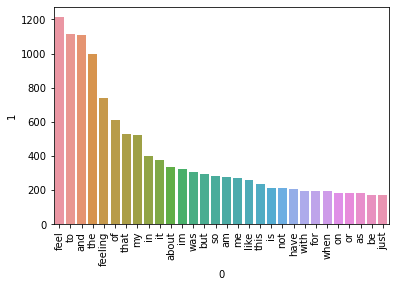

In [28]:
sns.barplot(pd.DataFrame(Counter(fear_corpus).most_common(30))[0],
           pd.DataFrame(Counter(fear_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [29]:
anger_corpus=[]

In [30]:
for msg in df[df['Emotion']=='anger']['preprocessed_text'].tolist():
    for word in msg.split():
        anger_corpus.append(word)

In [31]:
len(anger_corpus)

33951

In [32]:
anger_corpus

['im',
 'so',
 'full',
 'of',
 'life',
 'feel',
 'appalled',
 'feel',
 'jealous',
 'becasue',
 'wanted',
 'that',
 'kind',
 'of',
 'love',
 'the',
 'true',
 'connection',
 'between',
 'two',
 'souls',
 'and',
 'wanted',
 'that',
 'when',
 'friend',
 'of',
 'mine',
 'keeps',
 'telling',
 'me',
 'morbid',
 'things',
 'that',
 'happened',
 'to',
 'his',
 'dog',
 'finally',
 'fell',
 'asleep',
 'feeling',
 'angry',
 'useless',
 'and',
 'still',
 'full',
 'of',
 'anxiety',
 'feel',
 'bit',
 'annoyed',
 'and',
 'antsy',
 'in',
 'good',
 'way',
 'just',
 'try',
 'not',
 'to',
 'talk',
 'to',
 'anyone',
 'when',
 'feel',
 'irritable',
 'like',
 'that',
 'feel',
 'like',
 'they',
 'hated',
 'me',
 'since',
 'then',
 'dont',
 'know',
 'who',
 'wrote',
 'the',
 'following',
 'little',
 'note',
 'but',
 'this',
 'is',
 'how',
 'feel',
 'today',
 'if',
 'offended',
 'by',
 'the',
 'following',
 'posting',
 'then',
 'you',
 'obviously',
 'have',
 'not',
 'lived',
 'long',
 'enough',
 'to',
 'be',
 '

In [33]:
from collections import Counter

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


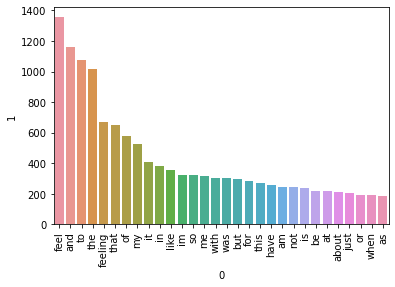

In [34]:
sns.barplot(pd.DataFrame(Counter(anger_corpus).most_common(30))[0],
           pd.DataFrame(Counter(anger_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [35]:
joy_corpus=[]

In [36]:
for msg in df[df['Emotion']=='joy']['preprocessed_text'].tolist():
    for word in msg.split():
        joy_corpus.append(word)

In [37]:
len(joy_corpus)

35230

In [38]:
joy_corpus

['ive',
 'been',
 'really',
 'angry',
 'with',
 'and',
 'feel',
 'like',
 'an',
 'idiot',
 'for',
 'trusting',
 'him',
 'in',
 'the',
 'first',
 'place',
 'feel',
 'like',
 've',
 'regained',
 'another',
 'vital',
 'part',
 'of',
 'my',
 'life',
 'which',
 'is',
 'living',
 'feel',
 'bit',
 'like',
 'franz',
 'liebkind',
 'in',
 'the',
 'producers',
 'not',
 'many',
 'people',
 'know',
 'it',
 'but',
 'the',
 'fuhrer',
 'was',
 'terrific',
 'dancer',
 'was',
 'feeling',
 'at',
 'the',
 'start',
 'didnt',
 'want',
 'to',
 'move',
 'much',
 'at',
 'all',
 'was',
 'really',
 'glad',
 'to',
 'experience',
 'this',
 'glimpse',
 'into',
 'the',
 'sort',
 'of',
 'vibrant',
 'energy',
 'will',
 'gain',
 'through',
 'out',
 'the',
 'year',
 'do',
 'not',
 'always',
 'find',
 'myself',
 'feeling',
 'thankful',
 'but',
 'over',
 'the',
 'years',
 've',
 'gathered',
 'few',
 'tricks',
 'that',
 'allow',
 'me',
 'to',
 'feel',
 'grateful',
 'in',
 'the',
 'face',
 'of',
 'moments',
 'when',
 'the',

In [39]:
from collections import Counter

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


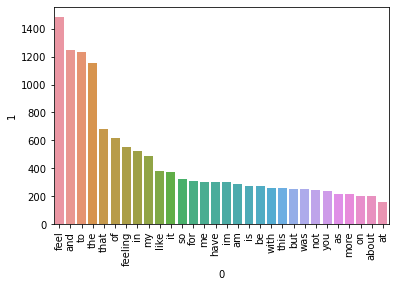

In [40]:
sns.barplot(pd.DataFrame(Counter(joy_corpus).most_common(30))[0],
           pd.DataFrame(Counter(joy_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotion', ylabel='count'>

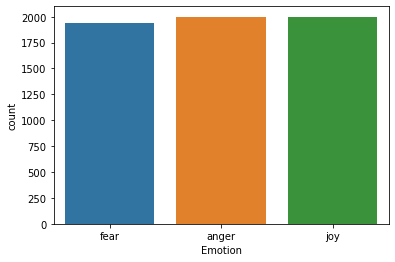

In [41]:
sns.countplot(df['Emotion'])

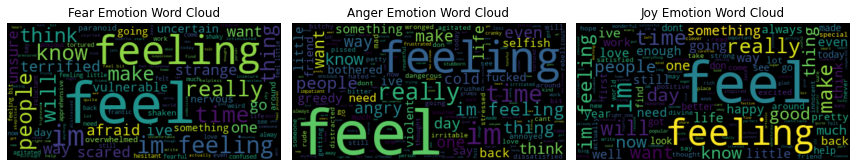

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fear_text = ' '.join(df[df.Emotion == 'fear'].preprocessed_text.tolist())
anger_text = ' '.join(df[df.Emotion == 'anger'].preprocessed_text.tolist())
joy_text = ' '.join(df[df.Emotion == 'joy'].preprocessed_text.tolist())

# Create WordCloud objects for each sentiment
fear_wordcloud = WordCloud().generate(fear_text)
anger_wordcloud = WordCloud().generate(anger_text)
joy_wordcloud = WordCloud().generate(joy_text)

# Create subplots for negative, neutral, and positive word clouds
plt.figure(figsize=(12, 8))

# Negative Word Cloud
plt.subplot(131)
plt.imshow(fear_wordcloud, interpolation='bilinear')
plt.title('Fear Emotion Word Cloud')
plt.axis('off')

# Neutral Word Cloud
plt.subplot(132)
plt.imshow(anger_wordcloud, interpolation='bilinear')
plt.title('Anger Emotion Word Cloud')
plt.axis('off')

# Positive Word Cloud
plt.subplot(133)
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.title('Joy Emotion Word Cloud')
plt.axis('off')

# Show the subplots
plt.tight_layout()
plt.show()

In [43]:
embeddings=[]
for x in df.preprocessed_text:
    print(x)

seriously hate one subject to death but now feel reluctant to drop it
im so full of life feel appalled
sit here to write start to dig out my feelings and think that am afraid to accept the possibility that he might not make it
ive been really angry with and feel like an idiot for trusting him in the first place
feel suspicious if there is no one outside like the rapture has happened or something
feel jealous becasue wanted that kind of love the true connection between two souls and wanted that
when friend of mine keeps telling me morbid things that happened to his dog
finally fell asleep feeling angry useless and still full of anxiety
feel bit annoyed and antsy in good way
feel like ve regained another vital part of my life which is living
feel bit like franz liebkind in the producers not many people know it but the fuhrer was terrific dancer
was feeling at the start didnt want to move much at all was really glad to experience this glimpse into the sort of vibrant energy will gain thro

In [44]:
import spacy
# Load the spacy model that you have installed
nlp = spacy.load('en_core_web_lg')

In [45]:
# process a sentence using the model
doc = nlp("This is some text that I am processing with Spacy")
# It's that simple - all of the vectors and words are assigned after this point

In [46]:
# Get the vector for 'text':
doc[-3], doc[-3].vector


(processing,
 array([-0.98158 , -2.6326  , -0.02352 ,  3.2856  ,  3.63    , -1.2795  ,
         3.6477  ,  4.1457  , -3.911   , -1.8988  ,  6.3144  ,  3.7014  ,
        -5.9561  ,  5.1211  , -1.8175  , -1.0002  ,  7.4333  ,  1.6981  ,
        -4.4509  , -1.9858  , -2.1477  ,  3.4198  , -5.8983  ,  1.8785  ,
        -3.4049  , -2.1389  , -0.63041 , -1.8979  ,  0.10881 , -0.63591 ,
         3.8009  ,  0.89979 , -4.6852  ,  0.17034 , -0.29025 , -5.6625  ,
         4.1363  ,  1.0943  ,  3.3971  ,  1.8353  ,  0.15847 , -0.96643 ,
         2.9794  , -0.68237 , -4.4391  ,  2.494   ,  4.9149  , -0.63641 ,
        -2.7878  , -2.0478  , -0.20991 ,  3.1249  , -1.678   , -5.3789  ,
        -2.6653  ,  0.82363 , -2.2348  ,  1.5312  ,  1.861   , -2.0801  ,
         4.343   ,  1.5988  , -2.3153  ,  0.62286 ,  3.0526  ,  1.7596  ,
        -3.0563  , -4.1593  , -1.0461  ,  0.62876 , -2.6396  ,  0.23815 ,
        -3.8904  ,  2.0345  , -1.1544  , -0.37425 , -5.1358  ,  3.371   ,
         0.90354 , -0.215

In [47]:
# Get the mean vector for the entire sentence (useful for sentence classification etc.)
doc.vector

array([ 0.13538204, -0.50049055,  0.26314098, -1.8586416 , -0.57580197,
       -0.07358702, -0.035399  ,  4.4508467 , -3.7474205 ,  1.6460339 ,
        6.90367   ,  1.3508627 , -2.7805922 , -0.6575441 ,  2.2817955 ,
        0.993958  ,  2.383111  , -0.21607213, -1.462939  ,  0.92183   ,
        1.0806081 ,  1.930987  , -3.292195  , -1.8399448 , -2.533392  ,
       -1.9827248 , -1.564382  , -1.138241  , -2.0831861 , -0.430525  ,
       -0.403931  , -0.11929995, -3.6540642 ,  0.19895704, -1.9910061 ,
        0.3238971 , -0.34544173,  0.969619  ,  5.6958246 ,  2.223509  ,
       -1.6114123 ,  2.346086  , -0.700554  , -1.539235  , -1.0771002 ,
        2.6830828 ,  3.4063332 , -2.901462  , -2.5829167 ,  1.1031249 ,
        1.362951  , -0.530291  ,  2.270077  , -4.8443303 , -1.537749  ,
        0.49870294,  2.492154  ,  1.8763611 ,  0.89088696,  0.88795805,
        4.37719   ,  0.06023499, -1.3463123 ,  0.22848296, -1.0967581 ,
        1.9763839 , -2.2734218 , -4.24074   ,  2.6045609 ,  3.91

In [48]:
embeddings=[]
for x in df.preprocessed_text:
    embeddings.append(nlp(x).vector)


In [49]:
embeddings[0]

array([-1.02288909e-01,  3.74121976e+00, -3.27412844e+00, -2.34111428e+00,
        1.69458377e+00,  2.95679712e+00,  2.23836231e+00,  4.55728483e+00,
       -2.73084927e+00, -5.92532277e-01,  6.52401638e+00,  1.08893609e+00,
       -3.84913301e+00,  2.60544991e+00,  6.96249306e-01, -1.13391387e+00,
        1.77134788e+00, -4.09513760e+00, -2.19710588e+00, -3.80439997e+00,
        1.25891471e+00, -6.09979928e-01,  1.35978416e-01, -2.13911772e+00,
        1.56906903e-01, -2.58330011e+00, -3.52608776e+00,  3.01521599e-01,
       -2.72225618e+00,  2.47439075e+00,  2.60772324e+00,  3.51220936e-01,
        1.72169238e-01, -2.41125441e+00, -2.70212555e+00, -3.69884782e-02,
        3.05644572e-01,  2.16997695e+00,  3.41966844e+00,  3.09959674e+00,
       -6.32152259e-01,  1.21879303e+00,  1.89214599e+00,  4.63904411e-01,
       -2.32093740e+00,  2.02046418e+00,  1.98317468e+00, -2.19195843e+00,
       -3.37055230e+00,  4.66467857e+00, -2.08592236e-01, -1.65039897e+00,
        5.06077381e-03, -

In [50]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [51]:
df.Emotion

0        fear
1       anger
2        fear
3         joy
4        fear
        ...  
5932     fear
5933    anger
5934      joy
5935     fear
5936    anger
Name: Emotion, Length: 5937, dtype: object

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotion', ylabel='count'>

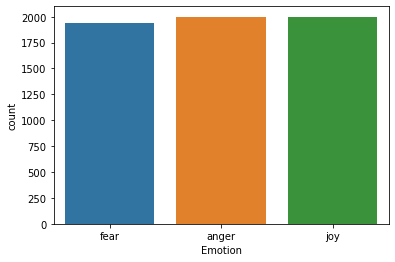

In [52]:
sns.countplot(df.Emotion)

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [54]:
df['Emotion']=le.fit_transform(df['Emotion'])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, df.Emotion, test_size=0.2)

In [56]:
y_train

4197    2
2756    1
3575    1
3370    2
270     1
       ..
2155    2
1356    0
5206    1
3876    2
3582    2
Name: Emotion, Length: 4749, dtype: int32

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def eval_model(y_true,y_predicted):
    cm = confusion_matrix(y_true, y_predicted) 
    cm_display=ConfusionMatrixDisplay(confusion_matrix = cm)
    cm_display.plot()
    print('accuracy score',accuracy_score(y_true, y_predicted))
    print(classification_report(y_true,y_predicted))


C:\Users\himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy score 0.7272727272727273
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       401
           1       0.70      0.70      0.70       386
           2       0.73      0.78      0.76       401

    accuracy                           0.73      1188
   macro avg       0.73      0.73      0.73      1188
weighted avg       0.73      0.73      0.73      1188



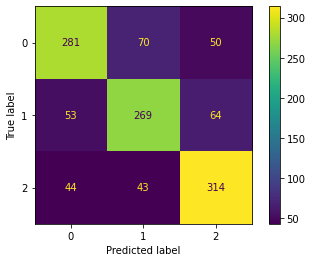

In [58]:
from sklearn.linear_model import LogisticRegression  

model = LogisticRegression(max_iter=100) 
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


eval_model(y_test, y_pred)


accuracy score 0.5033670033670034
              precision    recall  f1-score   support

           0       0.47      0.51      0.49       401
           1       0.44      0.38      0.41       386
           2       0.59      0.62      0.60       401

    accuracy                           0.50      1188
   macro avg       0.50      0.50      0.50      1188
weighted avg       0.50      0.50      0.50      1188



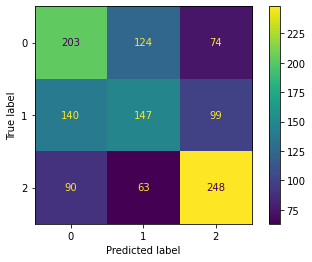

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

eval_model(y_test, rf_y_pred)


In [60]:
import xgboost as xgb

In [61]:
xgb_i=xgb.XGBClassifier()


accuracy score 0.5740740740740741
              precision    recall  f1-score   support

           0       0.54      0.51      0.53       401
           1       0.53      0.49      0.51       386
           2       0.63      0.71      0.67       401

    accuracy                           0.57      1188
   macro avg       0.57      0.57      0.57      1188
weighted avg       0.57      0.57      0.57      1188



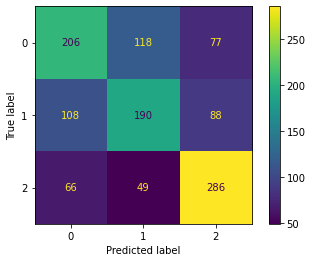

In [62]:
xgb_i.fit(X_train, y_train)

xgb_y_pred = xgb_i.predict(X_test)

eval_model(y_test, xgb_y_pred)

In [63]:
from sklearn.tree import DecisionTreeClassifier

accuracy score 0.4116161616161616
              precision    recall  f1-score   support

           0       0.41      0.42      0.42       401
           1       0.38      0.38      0.38       386
           2       0.45      0.43      0.44       401

    accuracy                           0.41      1188
   macro avg       0.41      0.41      0.41      1188
weighted avg       0.41      0.41      0.41      1188



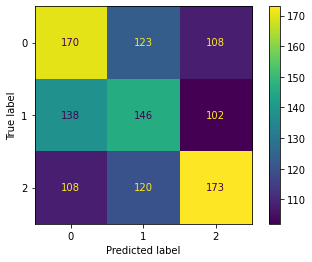

In [64]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

dtc_y_pred = dtc_model.predict(X_test)

eval_model(y_test, dtc_y_pred)


In [65]:
from sklearn.ensemble import ExtraTreesClassifier


In [66]:
clf_model = ExtraTreesClassifier(n_estimators=100, random_state=42)


accuracy score 0.48148148148148145
              precision    recall  f1-score   support

           0       0.47      0.51      0.49       401
           1       0.39      0.33      0.36       386
           2       0.57      0.60      0.58       401

    accuracy                           0.48      1188
   macro avg       0.47      0.48      0.48      1188
weighted avg       0.48      0.48      0.48      1188



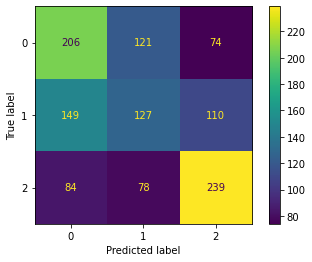

In [67]:
clf_model.fit(X_train, y_train)

clf_y_pred = clf_model.predict(X_test)

eval_model(y_test, clf_y_pred)


In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knc_model=KNeighborsClassifier()

accuracy score 0.414983164983165
              precision    recall  f1-score   support

           0       0.39      0.59      0.47       401
           1       0.39      0.36      0.38       386
           2       0.51      0.29      0.37       401

    accuracy                           0.41      1188
   macro avg       0.43      0.41      0.41      1188
weighted avg       0.43      0.41      0.41      1188



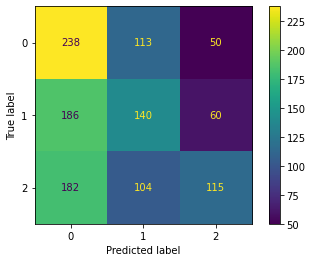

In [70]:
knc_model.fit(X_train, y_train)

knc_y_pred = knc_model.predict(X_test)

eval_model(y_test, knc_y_pred)
